In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(xtrain,ytrain),(xtest,ytest)= fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(f"Shape of xtrain data {xtrain.shape}")
print(f"Shape of ytrain data {ytrain.shape}")
print(f"Shape of xtest data {xtest.shape}")
print(f"Shape of ytest data {ytest.shape}")

Shape of xtrain data (60000, 28, 28)
Shape of ytrain data (60000,)
Shape of xtest data (10000, 28, 28)
Shape of ytest data (10000,)


In [ ]:
type(xtrain)

numpy.ndarray

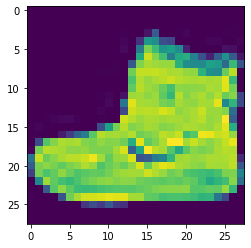

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(xtrain[0])

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(xtrain[0])

In [ ]:
for i in range(10):
  cv2_imshow(xtrain[i])

In [ ]:
#feature scalling
xtrain=xtrain.astype("float32")/255
xtest=xtest.astype("float32")/255

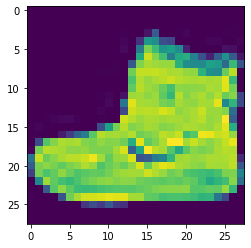

In [ ]:
plt.imshow(xtrain[0])

In [ ]:
#xtrain[0]

In [ ]:
print(xtrain[0].max())

1.0


In [ ]:
#reshape + gray sclae the images as model expect
xtrain=xtrain.reshape(60000,28,28,1)  #1 for gray img
xtest=xtest.reshape(10000,28,28,1)  #1 for gray img

In [ ]:
xtrain[0].shape

(28, 28, 1)

In [ ]:
#one hot encode the target col 
from tensorflow.keras.utils import to_categorical #one-hot encode target column
ytrain = to_categorical(ytrain,dtype ="uint8")
ytest = to_categorical(ytest, dtype ="uint8")


In [ ]:
ytrain[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten ,Dropout,MaxPool2D

#create model 
model=Sequential()

#convulation layer 1 
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
#convulation layer 2
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Dropout(rate=0.25))
#Flaten 
model.add(Flatten())



#Dense 
model.add(Dense(128,activation='softmax'))

model.add(Dropout(rate = 0.5))
model.add(Dense(10,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                        

In [ ]:
from tensorflow.keras.optimizers import Adam
#Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.metrics import categorical_crossentropy


model.compile(optimizer=optimizer , loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 176s 94ms/step - loss: 1.2015 - accuracy: 0.5323 - val_loss: 0.6091 - val_accuracy: 0.8880
Epoch 2/10
1875/1875 [==============================] - 178s 95ms/step - loss: 1.1238 - accuracy: 0.5538 - val_loss: 0.5665 - val_accuracy: 0.8928
Epoch 3/10
1875/1875 [==============================] - 169s 90ms/step - loss: 0.9897 - accuracy: 0.6281 - val_loss: 0.4736 - val_accuracy: 0.8912
Epoch 4/10
1875/1875 [==============================] - 169s 90ms/step - loss: 0.8980 - accuracy: 0.6601 - val_loss: 0.4280 - val_accuracy: 0.9002
Epoch 5/10
1875/1875 [==============================] - 175s 93ms/step - loss: 0.8342 - accuracy: 0.6913 - val_loss: 0.3828 - val_accuracy: 0.9028
Epoch 6/10
1875/1875 [==============================] - 176s 94ms/step - loss: 0.7567 - accuracy: 0.7184 - val_loss: 0.3539 - val_accuracy: 0.9075
Epoch 7/10
1875/1875 [==============================] - 176s 94ms/step - loss: 0.7155 - accuracy: 0.7328 - val_loss: 0

In [ ]:
model.save('fashion.h5')

In [ ]:
_ ,acc =model.evaluate(xtest,ytest, verbose=0)
print(f"{acc*100 :.2f} %")

90.59 %


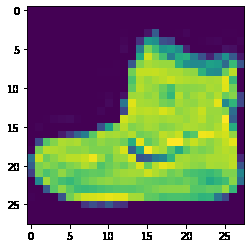

In [ ]:
import tensorflow as tf
tf.keras.preprocessing.image.load_img('/content/testimg2.png')

In [ ]:
testimg=tf.keras.preprocessing.image.load_img('/content/testimg2.png',color_mode ="grayscale" ,target_size=(28,28))
testimg

In [ ]:
img=tf.keras.preprocessing.image.img_to_array(testimg)

from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
img=img.reshape(1,28,28,1)
img=img.astype('float32')
img=img/255.0

In [ ]:
prediction = model.predict(img)

#print(prediction)

In [ ]:
from numpy import argmax
prediction=argmax(prediction)
print(f"Prediction : { prediction }")

Prediction : 8


In [ ]:
dic={0:"Top/T-shirt",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

In [ ]:
print(f" Prediction : {dic[prediction]}")

 Prediction : Bag
